# Customer Behaviour Analysis using python

### customer behaviour analysis is a valuabel process that empowers businesses to make data drivewn decisions, enhancing customer experience and remain competetive in dynamic market.


### process steps as follows.
### Step 1- collect data related to customer interaction. It can include transaction history, website visit, social media engagement , customer feedback.
### Step 2- Identify and address data inconsistencies, missing values and outliers to ensure the data quality and accuracy.
### Step 3- Calculate basic statistics like mean , median , mode and std deviation to summerize data .
### Step 4- create visualizations like histogram, plot graphs to explore trends, patterns and  anamolies in data.
### Step 5- use techniques like clustering to group cumstomers based on common behaviours of characteristics.


# start

In [7]:
# importing necessary libraries and dataset.
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv("C:/Users/Mahesh/Downloads/ecommerce_customer_data.csv")
print(data.head())

   User_ID  Gender  Age   Location Device_Type  Product_Browsing_Time  \
0        1  Female   23  Ahmedabad      Mobile                     60   
1        2    Male   25    Kolkata      Tablet                     30   
2        3    Male   32  Bangalore     Desktop                     37   
3        4    Male   35      Delhi      Mobile                      7   
4        5    Male   27  Bangalore      Tablet                     35   

   Total_Pages_Viewed  Items_Added_to_Cart  Total_Purchases  
0                  30                    1                0  
1                  38                    9                4  
2                  13                    5                0  
3                  20                   10                3  
4                  20                    8                2  


In [17]:
#summery statistics for numeric columns.
numeric_summery = data.describe()
print(numeric_summery)

          User_ID         Age  Product_Browsing_Time  Total_Pages_Viewed  \
count  500.000000  500.000000             500.000000          500.000000   
mean   250.500000   26.276000              30.740000           27.182000   
std    144.481833    5.114699              15.934246           13.071596   
min      1.000000   18.000000               5.000000            5.000000   
25%    125.750000   22.000000              16.000000           16.000000   
50%    250.500000   26.000000              31.000000           27.000000   
75%    375.250000   31.000000              44.000000           38.000000   
max    500.000000   35.000000              60.000000           50.000000   

       Items_Added_to_Cart  Total_Purchases  
count           500.000000       500.000000  
mean              5.150000         2.464000  
std               3.203127         1.740909  
min               0.000000         0.000000  
25%               2.000000         1.000000  
50%               5.000000         2.00

In [19]:
#summeey for  non-numeric columns.
categorical_summery = data.describe(include = 'object')
print(categorical_summery)

       Gender Location Device_Type
count     500      500         500
unique      2        8           3
top      Male  Kolkata      Mobile
freq      261       71         178


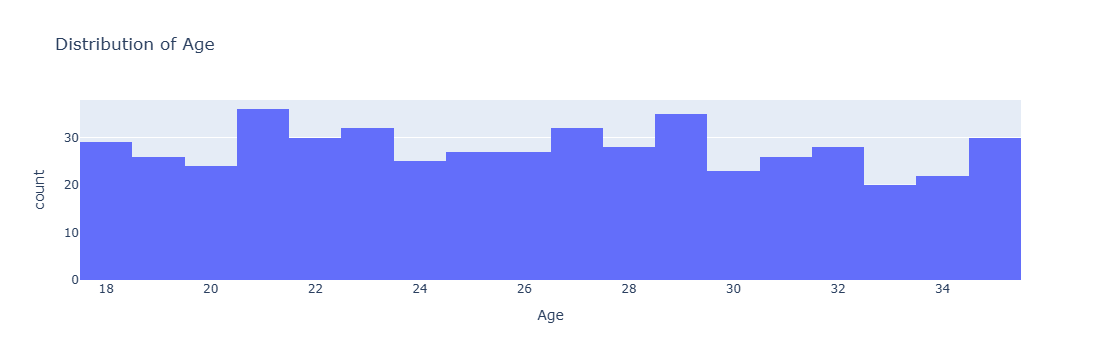

In [23]:
# distribution of age column  in dataset.
# histogram for  'Age'.
fig = px.histogram(data, x = 'Age',title = 'Distribution of Age')
fig.show()

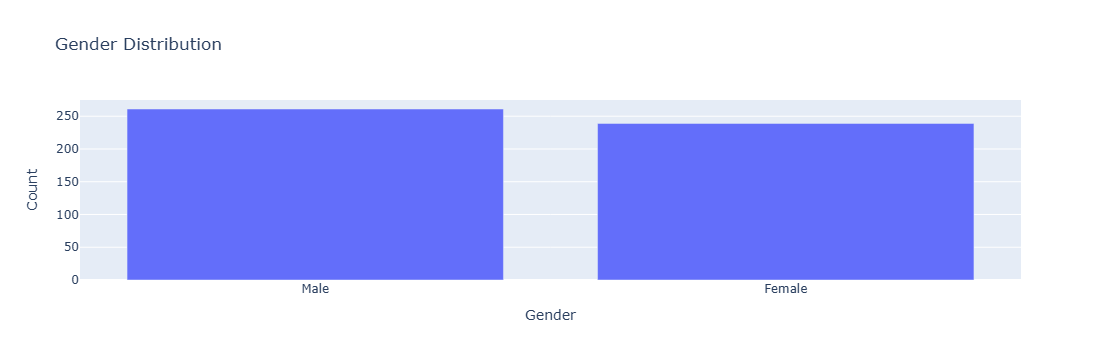

In [27]:
# Gender Distribution.
# Bar chart for 'Gender' distribution.
gender_counts = data['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender','Count']
fig = px.bar(gender_counts, x= 'Gender', y='Count', title='Gender Distribution')
fig.show()


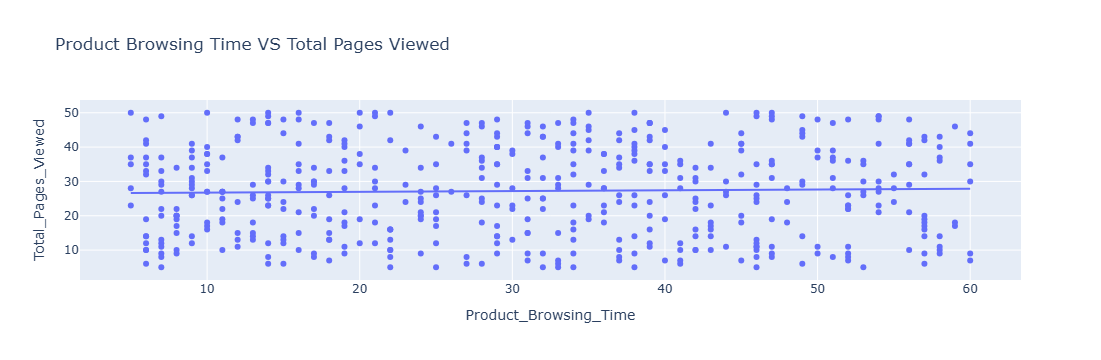

In [31]:
# Analysing customer behaviour.
# Relation between Product browsing time and total pages viewed.
#'Product_Browsing_Time' vs 'Total_Pages_Viewed'
fig = px.scatter(data, x ='Product_Browsing_Time', y = 'Total_Pages_Viewed', title = 'Product Browsing Time VS Total Pages Viewed',trendline = 'ols')
fig.show()

In [ ]:
# the above scatter plot shows no consistent pattern or strong relationn between product browsing time vs pages viewed.

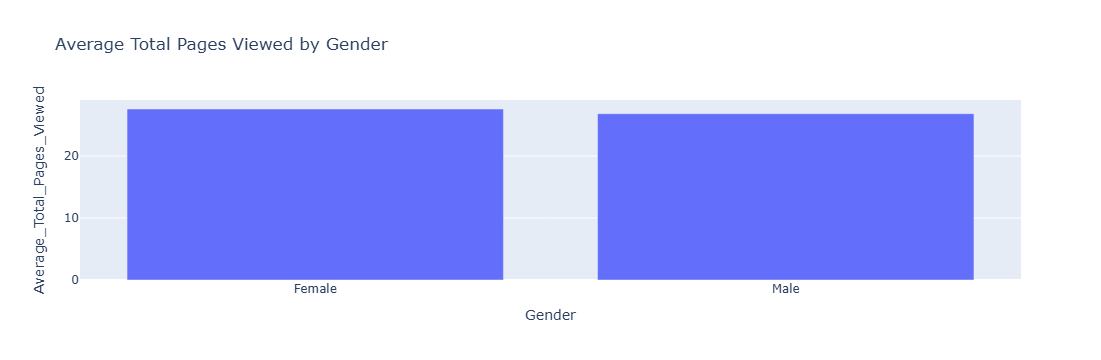

In [35]:
# Average total pages viewd by gender. 
# Grouped Analysis.
gender_grouped = data.groupby('Gender')['Total_Pages_Viewed'].mean().reset_index()
gender_grouped.columns = ['Gender','Average_Total_Pages_Viewed']
fig = px.bar(gender_grouped, x = 'Gender', y = 'Average_Total_Pages_Viewed', title = 'Average Total Pages Viewed by Gender')
fig.show()

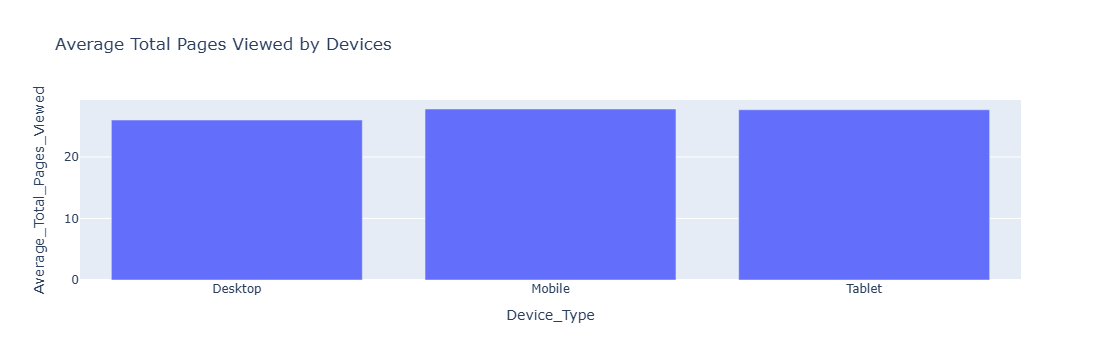

In [41]:
#  Average Total pages viewed by devices.
# Grouped Analysis.
devices_grouped = data.groupby('Device_Type')['Total_Pages_Viewed'].mean().reset_index()
devices_grouped.columns = ['Device_Type','Average_Total_Pages_Viewed']
fig = px.bar(devices_grouped, x='Device_Type', y ='Average_Total_Pages_Viewed', title = 'Average Total Pages Viewed by Devices')
fig.show()


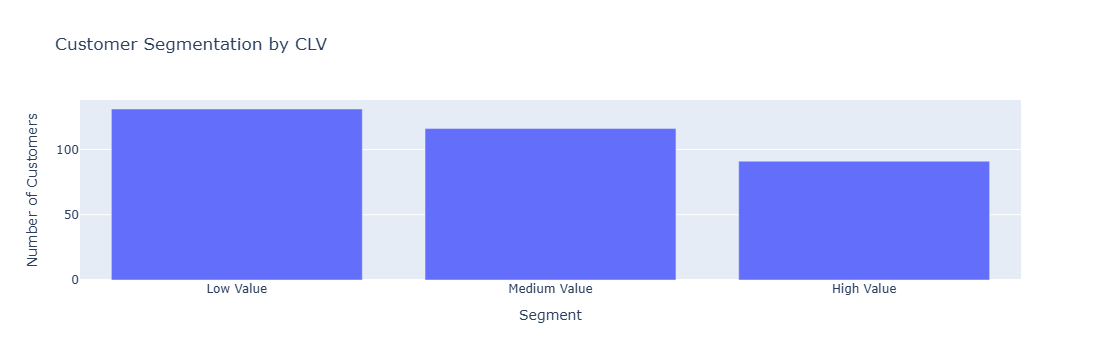

In [47]:
# lets calculate Customer Lifetime Value (CLV) and visualize segments based on CSV.

data['CLV'] = (data['Total_Purchases'] * data['Total_Pages_Viewed'])/data['Age']
data['Segment'] = pd.cut(data['CLV'],bins = [1,2.5,5, float('inf')], labels=['Low Value','Medium Value','High Value'])
segment_counts = data['Segment'].value_counts().reset_index()
segment_counts.columns =['Segment','Count']

# creating a bar chart to visualize the customer segments.
fig = px.bar(segment_counts, x='Segment',y = 'Count', title = 'Customer Segmentation by CLV')
fig.update_xaxes(title = 'Segment')
fig.update_yaxes(title = 'Number of Customers')
fig.show()

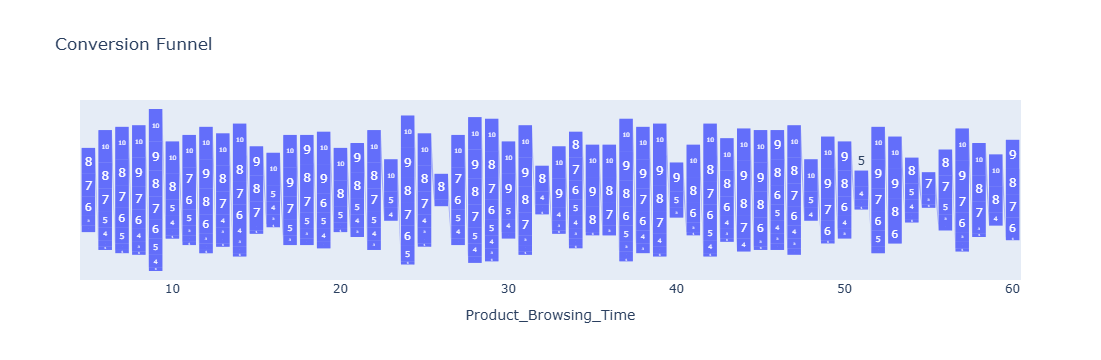

In [53]:
# lets hacve look at conversion funnel of customers.
# funnel analysis

funnel_data = data[['Product_Browsing_Time','Items_Added_to_Cart','Total_Purchases']]
funnel_data = funnel_data.groupby(['Product_Browsing_Time','Items_Added_to_Cart']).sum().reset_index()
fig = px.funnel(funnel_data, x='Product_Browsing_Time' , y = 'Items_Added_to_Cart', title = 'Conversion Funnel')
fig.show()

In [ ]:
#  In above graph x axis denotes time spent by customer and y axis denotes product added to cart during browsing session.


In [55]:
# lets have look at churn rate of cusmtomers:

# calculate churn rate
data['Churned'] = data['Total_Purchases'] == 0
churn_rate = data['Churned'].mean()
print(churn_rate)

0.198


## a chrun rate of 0.198 indicates that significant portion of customers has churned, and addressing this churn is important for maintaining business growth and profitability.

# Summery
### Customer Behaviour Analysis is a process that invloves examining and understanding cusmtomer interactions with business,porducts or service.
### this analysis helps organisations to take informed decisions,tailor their strategies and enhance customer experiences.